In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [3]:
# in this notebook, we'd like to predict the label 'romana final'
# this is a regression problem, because our label is a continuos value
df = pd.read_csv('note.csv')

df = df.reset_index()

In [3]:
df.head()

,index,nume,judet8,scoala,media la admitere,media teze nationale,media de absolvire,nota la limba romana,nota la matematica,optional8,...,disciplina profil nota,disciplina profil contestatie,disciplina profil final,optional,optional nota,optional contestatie,optional final,competente digitale,media,rezultatul final
0,0,cireap p. florin,BIHOR,SC.CU CLS.I-VIII PIETROASA,9.32,9.10,9.54,8.17,9.45,Geografie,...,3.30,NaN,3.30,"Anatomie si fiziologie umana, genetica si ecol...",6.60,NaN,6.60,Avansat,5.07,Respins
1,1,gabor i. ionut darius,BIHOR,"SC.CU CLS.I-VIII ""N.POPOVICIU"" BEIUS",9.12,8.63,9.62,8.30,8.00,Geografie,...,1.55,NaN,1.55,"Anatomie si fiziologie umana, genetica si ecol...",7.55,NaN,7.55,Mediu,5.60,Respins
2,2,bogan s. sebastian doru,BIHOR,SC.CU CLS.I-VIII CALUGARI,8.71,7.90,9.52,7.62,6.97,Geografie,...,2.80,2.3,2.30,"Anatomie si fiziologie umana, genetica si ecol...",6.70,NaN,6.70,Mediu,5.40,Respins
3,3,apati m. mihai bogdan,BIHOR,SC.CU CLS.I-VIII CARASAU,8.36,8.21,8.51,7.30,7.95,Geografie,...,3.85,4.2,3.85,"Anatomie si fiziologie umana, genetica si ecol...",6.30,NaN,6.30,Mediu,5.05,Respins
4,4,filip g. flaviu georgian,BIHOR,"LICEUL PEDAGOGIC ""N.BOLCAS"" BEIUS",8.31,7.73,8.89,6.40,8.72,Istorie,...,3.65,3.4,3.65,"Anatomie si fiziologie umana, genetica si ecol...",8.60,NaN,8.60,Avansat,6.40,Respins


In [4]:
df.keys()

Index([u'index', u'nume', u'judet8', u'scoala', u'media la admitere',
       u'media teze nationale', u'media de absolvire', u'nota la limba romana',
       u'nota la matematica', u'optional8', u'optional8 nota',
       u'limba materna8', u'limba materna8 nota',
       u'pozitia in ierarhie pe judet', u'pozitia in ierarhie pe tara',
       u'unitatea de invatamant', u'judetul', u'promotie anterioara',
       u'forma invatamant', u'specializare', u'romana oral', u'romana nota',
       u'romana contestatie', u'romana final', u'limba materna',
       u'materna oral', u'materna nota', u'materna contestatie',
       u'materna final', u'limba moderna', u'limba moderna nota',
       u'disciplina profil', u'disciplina profil nota',
       u'disciplina profil contestatie', u'disciplina profil final',
       u'optional', u'optional nota', u'optional contestatie',
       u'optional final', u'competente digitale', u'media',
       u'rezultatul final'],
      dtype='object')

In [5]:
#check the type of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10112 entries, 0 to 10111
Data columns (total 42 columns):
index                            10112 non-null int64
nume                             10112 non-null object
judet8                           10112 non-null object
scoala                           10112 non-null object
media la admitere                10112 non-null float64
media teze nationale             10112 non-null float64
media de absolvire               10112 non-null float64
nota la limba romana             10112 non-null float64
nota la matematica               10112 non-null float64
optional8                        10112 non-null object
optional8 nota                   10112 non-null float64
limba materna8                   10112 non-null object
limba materna8 nota              10112 non-null object
pozitia in ierarhie pe judet     10112 non-null int64
pozitia in ierarhie pe tara      10112 non-null int64
unitatea de invatamant           10112 non-null object
judetul 

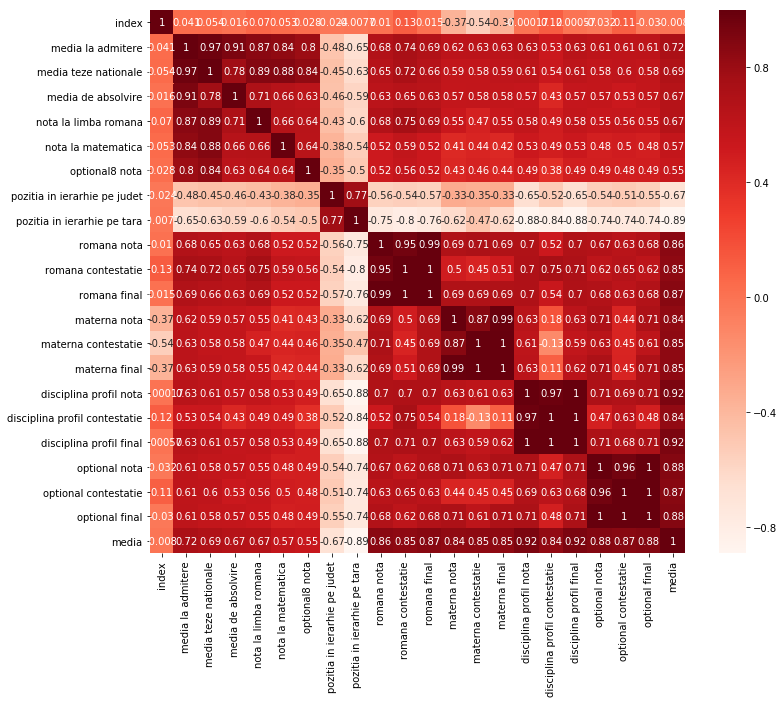

In [6]:
#see correlations between features
#Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [7]:
#features to drop because of high correlation
#correlation with target
cor_target = abs(cor['romana final'])

#selecting highly correlated features
cor_target[cor_target>0.7]

pozitia in ierarhie pe tara    0.755018
romana nota                    0.994553
romana contestatie             0.996705
romana final                   1.000000
disciplina profil nota         0.701013
disciplina profil final        0.701654
media                          0.867656
Name: romana final, dtype: float64

In [8]:
# 'disciplina profil final' and 'disciplina profil nota' won't be removed because (we know that) they are not highly correlated
# with the final grade
# Now, check which feautures are correlated with each other
# usually they do not work well with Linear Regression but Random Forest and other algorithms can handle them well

corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

for col in upper.columns:
    for column in upper.columns:
        if upper[col][column] > 0.7:
            print col,",", column, ",", upper[col][column]

media teze nationale , media la admitere , 0.9655196770801241
media de absolvire , media la admitere , 0.9135406400044599
media de absolvire , media teze nationale , 0.7761670804252022
nota la limba romana , media la admitere , 0.8657193251786941
nota la limba romana , media teze nationale , 0.8883163047127001
nota la limba romana , media de absolvire , 0.7089494313143319
nota la matematica , media la admitere , 0.8402398846110551
nota la matematica , media teze nationale , 0.8820549234953408
optional8 nota , media la admitere , 0.8004583967214143
optional8 nota , media teze nationale , 0.8374935156160862
pozitia in ierarhie pe tara , pozitia in ierarhie pe judet , 0.7725971898119153
romana nota , pozitia in ierarhie pe tara , 0.7503369808865339
romana contestatie , media la admitere , 0.7366297524788937
romana contestatie , media teze nationale , 0.7243609994884994
romana contestatie , nota la limba romana , 0.7536375455872151
romana contestatie , pozitia in ierarhie pe tara , 0.79546

In [9]:
# we can see that 'media teze nationale' and 'media la admitere' are highly correlated(because one is used in the calculation of the other one)
# 'nota la limba romana' and 'optional8 nota' and 'nota la matematica' are highly correlated
# with both the 'media la admitere' and 'media teze nationale'
# these are obvious because some of the columns are just the average of other columns, so these will be removed
# but there is a neat trick here: we won't include the 'limba materna8 nota' feature because it has many empty values, but instead
# we include both the 'media teze nationale' and the grades for other subjects because in this way
# 'media teze nationale' will contain in itself the value for 'limba materna8 nota'

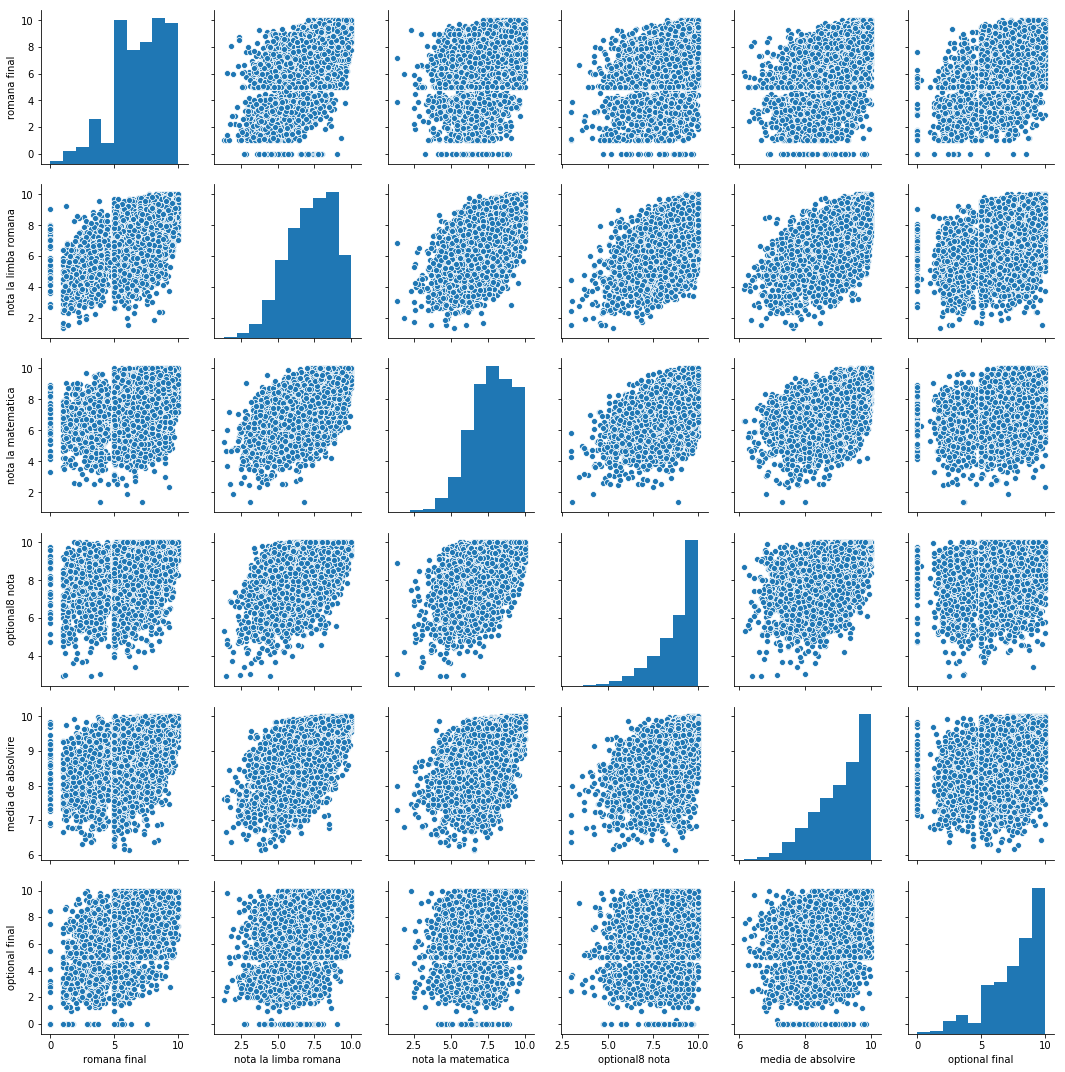

In [10]:
# now we include a pairplot with the grades to see some correlations between them in more depth
# 
pair = df[['romana final','nota la limba romana','nota la matematica','optional8 nota','media de absolvire','optional final']]

sns.pairplot(pair)

In [11]:
# we can see that the correlations are not so obvious, and also we can see that there are many outliers

In [12]:
# some information about our target column
df['romana final'].describe()

count    10112.000000
mean         6.893004
std          2.040470
min          0.000000
25%          5.450000
50%          7.200000
75%          8.600000
max         10.000000
Name: romana final, dtype: float64

In [13]:
#we can see that our target value lies between 0.0 and 10.0 
#This is an important information when we evaluate the error of the model

In [8]:
#because for every subject there are 3 grades(initial, 'contestatie', final) and we saw that they are highly correlated
#we can jsut include the final grade to speed up the algorithm
#drop these columns + the highly correlated columns
X = df.drop(['index','materna oral','materna nota','materna contestatie','materna final',
            'disciplina profil nota', 'disciplina profil contestatie', 'optional nota', 'optional contestatie',
            'media','rezultatul final','romana contestatie','romana final','romana nota','pozitia in ierarhie pe tara',
            'pozitia in ierarhie pe judet','limba materna8 nota'],
            
            axis=1)
Y = df['romana final']

In [15]:
X.keys()

Index([u'nume', u'judet8', u'scoala', u'media la admitere',
       u'media teze nationale', u'media de absolvire', u'nota la limba romana',
       u'nota la matematica', u'optional8', u'optional8 nota',
       u'limba materna8', u'unitatea de invatamant', u'judetul',
       u'promotie anterioara', u'forma invatamant', u'specializare',
       u'romana oral', u'limba materna', u'limba moderna',
       u'limba moderna nota', u'disciplina profil', u'disciplina profil final',
       u'optional', u'optional final', u'competente digitale'],
      dtype='object')

In [16]:
#Now, we are going to run some initial experiments to see the importance of features
#This will be done using a Random Forest Regrssor
#First, check the features with empty values
X.isna().sum()

nume                          0
judet8                        0
scoala                        0
media la admitere             0
media teze nationale          0
media de absolvire            0
nota la limba romana          0
nota la matematica            0
optional8                     0
optional8 nota                0
limba materna8                0
unitatea de invatamant        0
judetul                       0
promotie anterioara           0
forma invatamant              0
specializare                  0
romana oral                   0
limba materna              9174
limba moderna                 0
limba moderna nota         1025
disciplina profil             0
disciplina profil final       0
optional                      0
optional final                0
competente digitale           0
dtype: int64

In [10]:
#fill the column with empty values with 'none'
X['limba materna'].fillna("none", inplace=True)
X['limba materna'].unique()

array(['none', 'Maghiara', 'Slovaca', 'Ucraineana', 'Germana', 'Turca'],
      dtype=object)

In [9]:
# the grades in the modern language are given in letters, to have better meaning,
# we can convert them to a numerical value(A1-1 point,...B2-4 points), then the average is taken
# because there are some missing values(student who didn't take all the parts of the exam)
# those who have a language exam and didn't take the exam, will have the maximum grade of 4

from __future__ import division

def language_grade(val):
    if pd.notna(val):
        grades = val.split("-")
        sum = 0
        nr = 0#data is not complete, there are empty spots
        for grade in grades:
            if grade == 'A1':
                sum+=1
                nr+=1 #data is not complete, there are empty spots
            elif grade == 'A2': 
                sum+=2
                nr+=1
            elif grade == 'B1': 
                sum+=3
                nr+=1
            elif grade == 'B2': 
                sum+=4
                nr+=1
        
        if nr==0:
            return 0
        #print val, sum/nr
        return sum/nr

X['limba moderna nota'] = X['limba moderna nota'].apply(language_grade)
X['limba moderna nota']

0        2.80
1        3.40
2        2.40
3        1.50
4        1.40
5        1.80
6        1.50
7        2.80
8        2.00
9        2.00
10       1.50
11       2.20
12       1.75
13       2.25
14       2.40
15       2.80
16       1.75
17       1.75
18       1.75
19       1.75
20       2.50
21       2.50
22       2.25
23       1.50
24       1.20
25       3.60
26       4.00
27       2.60
28       2.00
29       1.40
         ... 
10082    4.00
10083    4.00
10084    2.20
10085    3.20
10086    3.60
10087    3.20
10088    4.00
10089    3.20
10090    2.00
10091    3.20
10092    2.00
10093    3.00
10094    4.00
10095    4.00
10096    4.00
10097    4.00
10098    3.60
10099    3.80
10100    3.00
10101    2.80
10102    3.80
10103    4.00
10104    4.00
10105    3.60
10106    4.00
10107    3.80
10108    3.80
10109    4.00
10110    2.00
10111    4.00
Name: limba moderna nota, Length: 10112, dtype: float64

In [11]:
X['limba moderna nota'].fillna(4.0, inplace=True)#grade 4.0(highest grade) for those who have a language exam
X.isna().sum()

nume                       0
judet8                     0
scoala                     0
media la admitere          0
media teze nationale       0
media de absolvire         0
nota la limba romana       0
nota la matematica         0
optional8                  0
optional8 nota             0
limba materna8             0
unitatea de invatamant     0
judetul                    0
promotie anterioara        0
forma invatamant           0
specializare               0
romana oral                0
limba materna              0
limba moderna              0
limba moderna nota         0
disciplina profil          0
disciplina profil final    0
optional                   0
optional final             0
competente digitale        0
dtype: int64

In [12]:
#replace the name column with firstnames
def firstname(name):
    fullname_list = name.split(" ")
    return fullname_list[len(fullname_list)-1]

X['nume'] = X['nume'].apply(firstname)

In [13]:
X['nume']

0                         florin
1                         darius
2                           doru
3                         bogdan
4                       georgian
5                         vasile
6                          iozef
7                          ionut
8                         daniel
9                       cristian
10                        adrian
11                        daniel
12                         tudor
13                        marius
14                      cristian
15                        alicia
16                    constantin
17                        vasile
18                         ionut
19                         petru
20                        george
21                        florin
22                      cristian
23                       claudia
24                      anamaria
25                       andreea
26                        cornel
27                        teofil
28                         ionut
29                         maria
          

In [14]:
#but we have students with several firstnames, we encode them with pandas' built in one hot encoder
#so we store all the firstnames of a student
names = X['nume'].str.get_dummies(sep='-').add_prefix('nume_')
names.head()

,nume_abel,nume_achim,nume_ada,nume_adalbert,nume_adam,nume_adel,nume_adela,nume_adelin,nume_adelina,nume_adeline,...,nume_zina,nume_zita,nume_zoltan,nume_zorand,nume_zsofia,nume_zsolt,nume_zsombor,nume_zsuzsa,nume_zsuzsana,nume_zsuzsanna
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#we can see that there are a total of 1023 firstnames

In [15]:
#merge new name columns with the old dataframe
X = pd.concat([X, names], axis = 1)

#drop the old name column
X = X.drop('nume', axis=1)
X.head()

,judet8,scoala,media la admitere,media teze nationale,media de absolvire,nota la limba romana,nota la matematica,optional8,optional8 nota,limba materna8,...,nume_zina,nume_zita,nume_zoltan,nume_zorand,nume_zsofia,nume_zsolt,nume_zsombor,nume_zsuzsa,nume_zsuzsana,nume_zsuzsanna
0,BIHOR,SC.CU CLS.I-VIII PIETROASA,9.32,9.10,9.54,8.17,9.45,Geografie,9.70,-,...,0,0,0,0,0,0,0,0,0,0
1,BIHOR,"SC.CU CLS.I-VIII ""N.POPOVICIU"" BEIUS",9.12,8.63,9.62,8.30,8.00,Geografie,9.60,-,...,0,0,0,0,0,0,0,0,0,0
2,BIHOR,SC.CU CLS.I-VIII CALUGARI,8.71,7.90,9.52,7.62,6.97,Geografie,9.10,-,...,0,0,0,0,0,0,0,0,0,0
3,BIHOR,SC.CU CLS.I-VIII CARASAU,8.36,8.21,8.51,7.30,7.95,Geografie,9.40,-,...,0,0,0,0,0,0,0,0,0,0
4,BIHOR,"LICEUL PEDAGOGIC ""N.BOLCAS"" BEIUS",8.31,7.73,8.89,6.40,8.72,Istorie,8.07,-,...,0,0,0,0,0,0,0,0,0,0


In [16]:
#now we should transform the categorical features into numerical ones
categorical_features = []
categorical_features_indices = []
for i,c in enumerate(X.columns):
        if X[c].dtype == 'object':
            categorical_features.append(c)
            categorical_features_indices.append(i)      
categorical_features

['judet8',
 'scoala',
 'optional8',
 'limba materna8',
 'unitatea de invatamant',
 'judetul',
 'promotie anterioara',
 'forma invatamant',
 'specializare',
 'romana oral',
 'limba materna',
 'limba moderna',
 'disciplina profil',
 'optional',
 'competente digitale']

In [26]:
#using dummy variables
X_dummy = pd.get_dummies(X, columns=categorical_features)
X_dummy.head()

,media la admitere,media teze nationale,media de absolvire,nota la limba romana,nota la matematica,optional8 nota,limba moderna nota,disciplina profil final,optional final,nume_abel,...,optional_Informatica T2 C/C++,optional_Informatica T2 Pascal,optional_Logica si argumentare,optional_Psihologie,optional_Sociologie,competente digitale_Avansat,competente digitale_Eliminat,competente digitale_Experimentat,competente digitale_Incepator,competente digitale_Mediu
0,9.32,9.10,9.54,8.17,9.45,9.70,2.8,3.30,6.60,0,...,0,0,0,0,0,1,0,0,0,0
1,9.12,8.63,9.62,8.30,8.00,9.60,3.4,1.55,7.55,0,...,0,0,0,0,0,0,0,0,0,1
2,8.71,7.90,9.52,7.62,6.97,9.10,2.4,2.30,6.70,0,...,0,0,0,0,0,0,0,0,0,1
3,8.36,8.21,8.51,7.30,7.95,9.40,1.5,3.85,6.30,0,...,0,0,0,0,0,0,0,0,0,1
4,8.31,7.73,8.89,6.40,8.72,8.07,1.4,3.65,8.60,0,...,0,0,0,0,0,1,0,0,0,0


In [27]:
#check the encoding for feature 'judet8'
for c in X_dummy.columns:
    if "judet8" in c:
        print c

judet8_ALBA
judet8_ARAD
judet8_ARGES
judet8_BACAU
judet8_BIHOR
judet8_BISTRITA-NASAUD
judet8_BOTOSANI
judet8_BRAILA
judet8_BRASOV
judet8_BUCURESTI
judet8_BUZAU
judet8_CALARASI
judet8_CARAS-SEVERIN
judet8_CLUJ
judet8_CONSTANTA
judet8_COVASNA
judet8_DAMBOVITA
judet8_DOLJ
judet8_GALATI
judet8_GIURGIU
judet8_GORJ
judet8_HARGHITA
judet8_HUNEDOARA
judet8_IALOMITA
judet8_IASI
judet8_ILFOV
judet8_MARAMURES
judet8_MEHEDINTI
judet8_MURES
judet8_NEAMT
judet8_OLT
judet8_PRAHOVA
judet8_SALAJ
judet8_SATU-MARE
judet8_SIBIU
judet8_SUCEAVA
judet8_TELEORMAN
judet8_TIMIS
judet8_TULCEA
judet8_VALCEA
judet8_VASLUI
judet8_VRANCEA


In [69]:
#Random Forest doesn't need scaled data -> no need to scale and normalize features
#we can simply train it straight ahead
X_train, X_test, Y_train, Y_test = train_test_split(X_dummy, Y, test_size=0.20, random_state = 40) #same seed to compare results

In [70]:
model = RandomForestRegressor(n_jobs=-1, n_estimators=100)
model.fit(X_train, Y_train.ravel())
print "training score=",model.score(X_train, Y_train)
print "test score=",model.score(X_test, Y_test)

training score= 0.9594491709223024
test score= 0.7046561708160581


In [30]:
#running cross validation to see the real accuracy
scores = cross_val_score(model, X_dummy, Y, cv=5)
print scores
print scores.mean()

[0.61870334 0.65110299 0.66052571 0.75099691 0.65986962]
0.6682397163298669


In [72]:
#feature importances are very important because they let use see what features can be removed and what are the most important ones
#where feature engineering can yield better results

feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_dummy.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

feature_importances

,importance
media la admitere,0.407779
disciplina profil final,0.115440
optional final,0.099330
romana oral_Experimentat,0.067965
nota la limba romana,0.037465
limba moderna nota,0.030138
media de absolvire,0.024753
nota la matematica,0.017738
media teze nationale,0.016644
optional8 nota,0.015808


In [32]:
#The interesting thing about this result is that 'romana oral_Experimentat' feature(one hot encoded feature)
#is among the most important ones, despite the fact that it is a single hot-encoded feature
#limba materna8_- means an empty value, this hot-encoded feature 'could' be removed for speed improvements
#judet8_HARGHITA is another interesting feature because this single county name is a good predictor
#(this is due to the Hungarian population in the area)
#of the target value despite the fact that there are more several other county names
#'limba moderna nota' is also interesting, and high feature importance shows that our conversion process to numerical
#values was a success


Text(0.5,0,'Relative Importance')

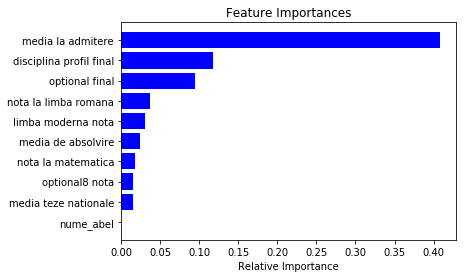

In [33]:
#top 10 feature importances seen on a plot

importances = model.feature_importances_[:10]
indices = np.argsort(importances)
features = X_dummy.columns

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [34]:
#most important names
for (a,b) in feature_importances:
    if "nume" in a:
        print a,b

nume_maria 0.00087
nume_andrei 0.00067
nume_alexandru 0.00058
nume_florin 0.00055
nume_daniel 0.0005
nume_andreea 0.00046
nume_rebeca 0.00046
nume_mihai 0.00045
nume_ionut 0.00044
nume_mihaela 0.00042
nume_alexandra 0.00041
nume_elena 0.00041
nume_cristian 0.00039
nume_cristina 0.00036
nume_razvan 0.00035
nume_madalina 0.00033
nume_marian 0.00031
nume_alina 0.0003
nume_daniela 0.0003
nume_roxana 0.00029
nume_georgiana 0.00028
nume_ioan 0.00028
nume_adriana 0.00027
nume_ioana 0.00027
nume_valentin 0.00026
nume_gabriel 0.00025
nume_nicoleta 0.00025
nume_bianca 0.00024
nume_claudia 0.00023
nume_ionela 0.00023
nume_marius 0.00023
nume_bogdan 0.00022
nume_eva 0.00022
nume_karoly 0.00022
nume_stefan 0.00022
nume_mariana 0.00021
nume_adrian 0.0002
nume_diana 0.0002
nume_florentina 0.0002
nume_florina 0.00019
nume_george 0.00019
nume_vlad 0.00019
nume_catalin 0.00018
nume_gheorghe 0.00018
nume_irimie 0.00018
nume_petronela 0.00018
nume_viorel 0.00018
nume_iulian 0.00017
nume_laura 0.00017
nume

nume_isabela 0.0
nume_isabella 0.0
nume_isabelle 0.0
nume_isaura 0.0
nume_isidora 0.0
nume_iura 0.0
nume_iustina 0.0
nume_iuxel 0.0
nume_ivona 0.0
nume_jacint 0.0
nume_jacinta 0.0
nume_jahel 0.0
nume_janet 0.0
nume_janina 0.0
nume_jasmina 0.0
nume_jeno 0.0
nume_jiva 0.0
nume_judit 0.0
nume_judita 0.0
nume_judith 0.0
nume_junior 0.0
nume_kalman 0.0
nume_kamil 0.0
nume_kamilla 0.0
nume_karina 0.0
nume_karla 0.0
nume_karles 0.0
nume_karmen 0.0
nume_karola 0.0
nume_kata 0.0
nume_katalina 0.0
nume_katinka 0.0
nume_kitty 0.0
nume_klara 0.0
nume_klaudia 0.0
nume_kristian 0.0
nume_kristof 0.0
nume_lacramioara 0.0
nume_lajos 0.0
nume_laurean 0.0
nume_laviniu 0.0
nume_lazar 0.0
nume_leila 0.0
nume_lelia 0.0
nume_lena 0.0
nume_lenke 0.0
nume_leonard 0.0
nume_leontin 0.0
nume_leontina 0.0
nume_lia 0.0
nume_liana 0.0
nume_liber 0.0
nume_liedia 0.0
nume_lilla 0.0
nume_lina 0.0
nume_linda 0.0
nume_lioara 0.0
nume_lisa 0.0
nume_lorenzzo 0.0
nume_loreta 0.0
nume_loriana 0.0
nume_lorin 0.0
nume_luana 0.

In [114]:
#check the average grades for the most important firstnames to see if these names have the lowest/highest grades or
#why this relation holds
from __future__ import division

fullDf = pd.concat([X, Y], axis = 1)

ind = 0
for a in feature_importances.index:
    if ind < 10:
        if "nume" in a:
            ind +=1
            sum = 0
            nr = 0
            for index, row in fullDf.iterrows():
                if row[a] == 1:#has this firstname
                    sum += row['romana final']
                    nr +=1
            print a, "avg. grade =", sum/nr

nume_maria avg. grade = 7.60212765957
nume_andrei avg. grade = 6.59431279621
nume_florin avg. grade = 6.00275590551
nume_alexandru avg. grade = 6.56743772242
nume_mihaela avg. grade = 7.63743455497
nume_daniel avg. grade = 5.99934640523
nume_elena avg. grade = 7.65062761506
nume_mihai avg. grade = 6.31598360656
nume_andreea avg. grade = 7.84133738602
nume_ionut avg. grade = 6.11931216931
nume_cristian avg. grade = 6.42536764706
nume_alexandra avg. grade = 7.83611111111
nume_cristina avg. grade = 7.58917525773
nume_razvan avg. grade = 6.7686440678
nume_ioan avg. grade = 6.2


In [ ]:
#calculating the highest average grade for firstnames would take too much time
#but we conclude from the above test that in fact there isn't a strong relationship between how large or small is the grade
#and how important is the name as a feature

In [35]:
#most important counties
for (a,b) in feature_importances:
    if "judet8" in a:
        print a,b

judet8_HARGHITA 0.00104
judet8_BIHOR 0.00084
judet8_TIMIS 0.0007
judet8_DOLJ 0.00063
judet8_SALAJ 0.00062
judet8_MARAMURES 0.00058
judet8_SUCEAVA 0.00052
judet8_SATU-MARE 0.0005
judet8_ALBA 0.00049
judet8_MURES 0.00047
judet8_BACAU 0.00042
judet8_GALATI 0.00037
judet8_HUNEDOARA 0.00036
judet8_CONSTANTA 0.00033
judet8_BOTOSANI 0.00026
judet8_BRASOV 0.00025
judet8_IASI 0.00024
judet8_TELEORMAN 0.00024
judet8_VASLUI 0.00024
judet8_BISTRITA-NASAUD 0.00021
judet8_NEAMT 0.00021
judet8_GIURGIU 0.0002
judet8_VRANCEA 0.00019
judet8_ARGES 0.00017
judet8_BRAILA 0.00015
judet8_CLUJ 0.00015
judet8_BUZAU 0.00013
judet8_CARAS-SEVERIN 0.00013
judet8_GORJ 0.00013
judet8_OLT 0.00012
judet8_BUCURESTI 0.0001
judet8_DAMBOVITA 0.0001
judet8_IALOMITA 9e-05
judet8_ILFOV 8e-05
judet8_PRAHOVA 8e-05
judet8_SIBIU 8e-05
judet8_TULCEA 7e-05
judet8_CALARASI 6e-05
judet8_MEHEDINTI 1e-05
judet8_ARAD 0.0
judet8_COVASNA 0.0
judet8_VALCEA 0.0


In [36]:
#most important schools
for (a,b) in feature_importances:
    if "scoala" in a:
        print a,b

scoala_SC.CU CLS.I-VIII MARGHITA 0.00028
scoala_GIMNAZIUL "LIVIU REBREANU" TG MURES 0.00027
scoala_LICEUL TEORETIC 'GEORGE MOROIANU' SACELE 0.00027
scoala_LICEUL TEORETIC "HENRI COANDA" CRAIOVA 0.00026
scoala_SCOALA CU CLASELE I-VIII "PETRU RARES" PROBOTA 0.00026
scoala_SCOALA CU CLASELE I-VIII NR 1 BOSANCI 0.00025
scoala_SCOALA CU CLASELE I-VIII NR. 2 HUSI 0.00024
scoala_SCOALA CU CLASELE I-VIII "GEORGE BARITIU" TURDA 0.00022
scoala_SCOALA CU CLASELE I-VIII LIPIA COMUNA MEREI 0.00022
scoala_SCOALA CU CLASELE I-VIII MOLDOVENESTI 0.00022
scoala_SCOALA CU CLASELE I-VIII "AVRAM IANCU" ALBA IULIA 0.00019
scoala_SCOALA CU CLASELE I-VIII 'JEAN BART' CONSTANTA 0.00019
scoala_SCOALA CU CLASELE I-VIII NR 8 "MIHAIL KOGALNICEANU" DOROHOI 0.00019
scoala_SCOALA DE ARTE SI MESERII MARGINEA 0.00019
scoala_SC.CU CLS.I-VIII CONSTANTIN SERBAN ALESD 0.00017
scoala_LICEUL CU PROGRAM SPORTIV SEBES 0.00016
scoala_SC.CU CLS.I-VIII ARANY JANOS SALONTA 0.00016
scoala_SCOALA CU CLASELE I - VIII FILIASI 0.00016


scoala_SCOALA CU CLASELE I-VIII NR. 2 STEFANESTI 4e-05
scoala_SCOALA CU CLASELE I-VIII NR. 3 "CONSTANTIN PARFENE" VASLUI 4e-05
scoala_SCOALA CU CLASELE I-VIII NR.1 CAREI 4e-05
scoala_SCOALA CU CLASELE I-VIII RAZBOIENI 4e-05
scoala_SCOALA CU CLASELE I-VIII REUSENI 4e-05
scoala_SCOALA CU CLASELE I-VIII VOITINEL 4e-05
scoala_SCOALA CU CLS.I-VIII GURUIENI 4e-05
scoala_SCOALA DE ARTE SI MESERII "GELLERT SANDOR" MICULA 4e-05
scoala_SCOALA DE ARTE SI MESERII CHIRNOGENI 4e-05
scoala_SCOALA DE ARTE SI MESERII LAZURI 4e-05
scoala_SCOALA DE ARTE SI MESERII MOARA NICA 4e-05
scoala_SCOALA DE ARTE SI MESERII TARNA MARE 4e-05
scoala_SCOALA GENERALA "C-TIN. SAVOIU" TG-JIU 4e-05
scoala_SCOALA GENERALA "KRIZA JANOS" CAPILNITA 4e-05
scoala_SCOALA GENERALA "TIBERIU MORARIU" SALVA 4e-05
scoala_SCOALA GENERALA CLS I - VIII NR 3 LUPENI 4e-05
scoala_SCOALA GENERALA CU CLASELE I-VIII IERNUT 4e-05
scoala_SCOALA GENERALA NR. 3 FAGARAS 4e-05
scoala_SCOALA GENERALA SINTEREAG 4e-05
scoala_SCOALA GIMNAZIALA "ADY SIN

scoala_SCOALA CU CLASELE I-VIII "GEORGE CALINESCU" ONESTI 1e-05
scoala_SCOALA CU CLASELE I-VIII "GEORGE COSBUC" BAIA MARE 1e-05
scoala_SCOALA CU CLASELE I-VIII "GEORGE COSBUC" SIGHETU MARMATIEI 1e-05
scoala_SCOALA CU CLASELE I-VIII "IOAN BANCESCU" ADINCATA 1e-05
scoala_SCOALA CU CLASELE I-VIII "ION CREANGA" BRAILA 1e-05
scoala_SCOALA CU CLASELE I-VIII "ION CREANGA" NR 9 SUCEAVA 1e-05
scoala_SCOALA CU CLASELE I-VIII "ION CREANGA" SATU MARE 1e-05
scoala_SCOALA CU CLASELE I-VIII "MATEI BASARAB" MANASTIREA 1e-05
scoala_SCOALA CU CLASELE I-VIII "MIHAI EMINESCU" BRAILA 1e-05
scoala_SCOALA CU CLASELE I-VIII "NICOLAE IORGA" BAIA MARE 1e-05
scoala_SCOALA CU CLASELE I-VIII "NICOLAE V. BALAN" LACU LUI BABAN 1e-05
scoala_SCOALA CU CLASELE I-VIII "O. GOGA" RASINARI 1e-05
scoala_SCOALA CU CLASELE I-VIII "ROMAN MUSAT" ROMAN 1e-05
scoala_SCOALA CU CLASELE I-VIII "SIMION FLOREA MARIAN" ILISESTI 1e-05
scoala_SCOALA CU CLASELE I-VIII "VICTOR ION POPA" DODESTI 1e-05
scoala_SCOALA CU CLASELE I-VIII 'B.P. H

scoala_COLEGIUL NATIONAL 'ANDREI SAGUNA' BRASOV 0.0
scoala_COLEGIUL NATIONAL 'AUREL VLAICU' ORASTIE 0.0
scoala_COLEGIUL NATIONAL 'CONSTANTIN CARABELLA' TARGOVISTE 0.0
scoala_COLEGIUL NATIONAL 'DECEBAL' DEVA 0.0
scoala_COLEGIUL NATIONAL 'DOAMNA STANCA' FAGARAS 0.0
scoala_COLEGIUL NATIONAL BILINGV "GEORGE COSBUC" 0.0
scoala_COLEGIUL NATIONAL LICEAL "A.I.CUZA" GALATI 0.0
scoala_COLEGIUL NATIONAL PEDAGOGIC "A.SAGUNA" SIBIU 0.0
scoala_COLEGIUL NATIONAL PEDAGOGIC 'CONSTANTIN BRATESCU' CONSTANTA 0.0
scoala_COLEGIUL NATIONAL VOCATIONAL "NICOLAE TITULESCU" SLATINA 0.0
scoala_COLEGIUL TEHNIC "A.T.LAURIAN" AGNITA 0.0
scoala_COLEGIUL TEHNIC "ALEXANDRU DOMSA" ALBA IULIA 0.0
scoala_COLEGIUL TEHNIC "DECEBAL" 0.0
scoala_COLEGIUL TEHNIC "HENRI COANDA" TULCEA 0.0
scoala_COLEGIUL TEHNIC "ION CREANGA" TARGU NEAMT 0.0
scoala_COLEGIUL TEHNIC "TRAIAN" 0.0
scoala_COLEGIUL TEHNIC 'MIRCEA CRISTEA' BRASOV 0.0
scoala_COLEGIUL TEHNIC 'TRANSILVANIA' DEVA 0.0
scoala_COLEGIUL TEHNIC DE ELECTRONICA SI TELECOMUNICATII 

scoala_SCOALA CU CLASE I-VIII NR. 14 TULCEA 0.0
scoala_SCOALA CU CLASE I-VIII NR.1 MACIN 0.0
scoala_SCOALA CU CLASE I-VIII NR.2 BABADAG 0.0
scoala_SCOALA CU CLASE I-VIII NR.2 TULCEA 0.0
scoala_SCOALA CU CLASE I-VIII NR.5 TULCEA 0.0
scoala_SCOALA CU CLASE I-VIII PECENEAGA 0.0
scoala_SCOALA CU CLASE I-VIII SIMBATA NOUA 0.0
scoala_SCOALA CU CLASE I-VIII SLAVA CERCHEZA 0.0
scoala_SCOALA CU CLASE I-VIII TURDA 0.0
scoala_SCOALA CU CLASE I-VIII VACARENI 0.0
scoala_SCOALA CU CLASELE I - VIII "AXENTE SEVER" MANARADE 0.0
scoala_SCOALA CU CLASELE I - VIII "BARBU IONESCU" URZICUTA 0.0
scoala_SCOALA CU CLASELE I - VIII "PETRE MANARCESCU" LIPOVU 0.0
scoala_SCOALA CU CLASELE I - VIII "PETRU PAVEL ARON" BLAJ 0.0
scoala_SCOALA CU CLASELE I - VIII "SIMION BARNUTIU" TIUR 0.0
scoala_SCOALA CU CLASELE I - VIII AFUMATI 0.0
scoala_SCOALA CU CLASELE I - VIII AMARASTII DE SUS 0.0
scoala_SCOALA CU CLASELE I - VIII BALTA 0.0
scoala_SCOALA CU CLASELE I - VIII BRALOSTITA 0.0
scoala_SCOALA CU CLASELE I - VIII BRATO

scoala_SCOALA CU CLASELE I-VIII CHIRPAR 0.0
scoala_SCOALA CU CLASELE I-VIII CHIUIESTI 0.0
scoala_SCOALA CU CLASELE I-VIII CIMPULUNG LA TISA 0.0
scoala_SCOALA CU CLASELE I-VIII CIOHORANI 0.0
scoala_SCOALA CU CLASELE I-VIII CIRESU 0.0
scoala_SCOALA CU CLASELE I-VIII CIUGHES 0.0
scoala_SCOALA CU CLASELE I-VIII CIUGUD 0.0
scoala_SCOALA CU CLASELE I-VIII CIUPELNITA DUMBRAVA 0.0
scoala_SCOALA CU CLASELE I-VIII COCA 0.0
scoala_SCOALA CU CLASELE I-VIII COCU 0.0
scoala_SCOALA CU CLASELE I-VIII COLONESTI 0.0
scoala_SCOALA CU CLASELE I-VIII COMLAUSA 0.0
scoala_SCOALA CU CLASELE I-VIII COPACELE 0.0
scoala_SCOALA CU CLASELE I-VIII CORBI 0.0
scoala_SCOALA CU CLASELE I-VIII CORBU NOU 0.0
scoala_SCOALA CU CLASELE I-VIII CORCOVA 0.0
scoala_SCOALA CU CLASELE I-VIII CORNATEL 0.0
scoala_SCOALA CU CLASELE I-VIII CORNU LUNCII 0.0
scoala_SCOALA CU CLASELE I-VIII CORNUTEL 0.0
scoala_SCOALA CU CLASELE I-VIII COSTINESTI 0.0
scoala_SCOALA CU CLASELE I-VIII COSULA 0.0
scoala_SCOALA CU CLASELE I-VIII COTEANA 0.0
s

scoala_SCOALA CU CLASELE I-VIII NR. 93 "EMIL RACOVITA" 0.0
scoala_SCOALA CU CLASELE I-VIII NR. 95 0.0
scoala_SCOALA CU CLASELE I-VIII NR. 97 0.0
scoala_SCOALA CU CLASELE I-VIII NR. 98 "AVRAM IANCU" 0.0
scoala_SCOALA CU CLASELE I-VIII NR.1 "CAPITAN AVIATOR MIRCEA T. BADULESCU" BUZAU 0.0
scoala_SCOALA CU CLASELE I-VIII NR.1 BARAGANUL 0.0
scoala_SCOALA CU CLASELE I-VIII NR.1 BICAZ CHEI 0.0
scoala_SCOALA CU CLASELE I-VIII NR.1 BILIESTI 0.0
scoala_SCOALA CU CLASELE I-VIII NR.1 BORSA 0.0
scoala_SCOALA CU CLASELE I-VIII NR.1 BURCA 0.0
scoala_SCOALA CU CLASELE I-VIII NR.1 CEAHLAU 0.0
scoala_SCOALA CU CLASELE I-VIII NR.1 CHISELET 0.0
scoala_SCOALA CU CLASELE I-VIII NR.1 COSTISA 0.0
scoala_SCOALA CU CLASELE I-VIII NR.1 COTESTI 0.0
scoala_SCOALA CU CLASELE I-VIII NR.1 FLORESTI 0.0
scoala_SCOALA CU CLASELE I-VIII NR.1 HAULISCA 0.0
scoala_SCOALA CU CLASELE I-VIII NR.1 HIRTOAPE 0.0
scoala_SCOALA CU CLASELE I-VIII NR.1 LEORDINA 0.0
scoala_SCOALA CU CLASELE I-VIII NR.1 LUNCA CETATUII 0.0
scoala_SCOALA

scoala_SCOALA CU CLASELE I-VIII SASAR 0.0
scoala_SCOALA CU CLASELE I-VIII SASCA MARE 0.0
scoala_SCOALA CU CLASELE I-VIII SASCIORI 0.0
scoala_SCOALA CU CLASELE I-VIII SASCUT 0.0
scoala_SCOALA CU CLASELE I-VIII SATU MARE 0.0
scoala_SCOALA CU CLASELE I-VIII SATULUNG 0.0
scoala_SCOALA CU CLASELE I-VIII SCARISOARA 0.0
scoala_SCOALA CU CLASELE I-VIII SCHIULESTI IZVOARELE 0.0
scoala_SCOALA CU CLASELE I-VIII SCORTARU NOU 0.0
scoala_SCOALA CU CLASELE I-VIII SERBANESTI 0.0
scoala_SCOALA CU CLASELE I-VIII SERBAUTI 0.0
scoala_SCOALA CU CLASELE I-VIII SFANTUL IACOB CAMPULUNG 0.0
scoala_SCOALA CU CLASELE I-VIII SICHEVITA 0.0
scoala_SCOALA CU CLASELE I-VIII SIMINICEA 0.0
scoala_SCOALA CU CLASELE I-VIII SIMINOC 0.0
scoala_SCOALA CU CLASELE I-VIII SLATINA TIMIS 0.0
scoala_SCOALA CU CLASELE I-VIII SLATIOARA 0.0
scoala_SCOALA CU CLASELE I-VIII SLIMNIC 0.0
scoala_SCOALA CU CLASELE I-VIII SLOBOZIA BOGHICEA 0.0
scoala_SCOALA CU CLASELE I-VIII SOCOND 0.0
scoala_SCOALA CU CLASELE I-VIII SODOMENI PASCANI 0.0
s

scoala_SCOALA DE ARTE SI MESERII DAMUC 0.0
scoala_SCOALA DE ARTE SI MESERII DELESTI 0.0
scoala_SCOALA DE ARTE SI MESERII DESESTI 0.0
scoala_SCOALA DE ARTE SI MESERII DIOSTI 0.0
scoala_SCOALA DE ARTE SI MESERII DORNESTI 0.0
scoala_SCOALA DE ARTE SI MESERII DRAGUSENI 0.0
scoala_SCOALA DE ARTE SI MESERII FACAENI 0.0
scoala_SCOALA DE ARTE SI MESERII FAGET 0.0
scoala_SCOALA DE ARTE SI MESERII FAGETELU 0.0
scoala_SCOALA DE ARTE SI MESERII FRATAUTII VECHI 0.0
scoala_SCOALA DE ARTE SI MESERII FRUMOASA 0.0
scoala_SCOALA DE ARTE SI MESERII GHERMANESTI 0.0
scoala_SCOALA DE ARTE SI MESERII GHERTA MICA 0.0
scoala_SCOALA DE ARTE SI MESERII GLODENII GINDULUI 0.0
scoala_SCOALA DE ARTE SI MESERII GRECI 0.0
scoala_SCOALA DE ARTE SI MESERII GRINTIES 0.0
scoala_SCOALA DE ARTE SI MESERII GROPENI 0.0
scoala_SCOALA DE ARTE SI MESERII GROPNITA 0.0
scoala_SCOALA DE ARTE SI MESERII GROZESTI 0.0
scoala_SCOALA DE ARTE SI MESERII HANTESTI 0.0
scoala_SCOALA DE ARTE SI MESERII HELESTENI 0.0
scoala_SCOALA DE ARTE SI 

scoala_SCOALA GIMNAZIALA GIRBOU 0.0
scoala_SCOALA GIMNAZIALA HOROATU CRASNEI 0.0
scoala_SCOALA GIMNAZIALA IAZ 0.0
scoala_SCOALA GIMNAZIALA INAU 0.0
scoala_SCOALA GIMNAZIALA JORASTI 0.0
scoala_SCOALA GIMNAZIALA LETCA 0.0
scoala_SCOALA GIMNAZIALA LOZNA 0.0
scoala_SCOALA GIMNAZIALA M.KOGALNICEANU 0.0
scoala_SCOALA GIMNAZIALA MAERISTE 0.0
scoala_SCOALA GIMNAZIALA MALU ALB 0.0
scoala_SCOALA GIMNAZIALA MARCA 0.0
scoala_SCOALA GIMNAZIALA MARIN 0.0
scoala_SCOALA GIMNAZIALA MESESENII DE SUS 0.0
scoala_SCOALA GIMNAZIALA NR 1 VALENI 0.0
scoala_SCOALA GIMNAZIALA NR.1 "ANGHEL RUGINA" TECUCI 0.0
scoala_SCOALA GIMNAZIALA NR.1 BUCESTI "EREMIA GRIGORESCU" 0.0
scoala_SCOALA GIMNAZIALA NR.1 CHIRAFTEI 0.0
scoala_SCOALA GIMNAZIALA NR.1 FAGETU 0.0
scoala_SCOALA GIMNAZIALA NR.1 LIESTI 0.0
scoala_SCOALA GIMNAZIALA NR.1 MOVILENI 0.0
scoala_SCOALA GIMNAZIALA NR.1 PECHEA 0.0
scoala_SCOALA GIMNAZIALA NR.1 PREOTEASA 0.0
scoala_SCOALA GIMNAZIALA NR.1 SIMLEU SILVANIEI 0.0
scoala_SCOALA GIMNAZIALA NR.1 TEPU "TUDOR PA

In [39]:
#we have 70% accuracy so far. Great. Let's see what accuracy we get if we remove our feature engineered columns

for col in ['limba materna', 'limba moderna nota', 'nume']:
    X2 = X_dummy.copy()
    for c in X_dummy.columns:
        if col in c:
            X2 = X2.drop(c, axis=1)
    
    X_train, X_test, Y_train, Y_test = train_test_split(X2, Y, test_size=0.20, random_state = 40) #same seed to compare results
    model = RandomForestRegressor(n_jobs=-1, n_estimators=100)
    model.fit(X_train, Y_train.ravel())
    print col,": training score=",model.score(X_train, Y_train)
    print col,": test score=",model.score(X_test, Y_test)

limba materna : training score= 0.9582673291028727
limba materna : test score= 0.7020720855324634
limba moderna nota : training score= 0.958064867997112
limba moderna nota : test score= 0.6975542150916615
nume : training score= 0.9588967384360745
nume : test score= 0.7046358880810741


In [49]:
# unfortunately we can see that, after one hot encoding,even if some features have high importance, overall these columns didn't
# improve our accuracy a lot
# so we run another test to see feature importances based on the big categorical features, without one hot encoding them
# we'll use Label encoding instead
X_label = X.copy()

for i,c in enumerate(X.columns):
        if X[c].dtype == 'object':
            lbl = LabelEncoder()
            lbl.fit(list(X[c].values))
            X_label[c] = lbl.transform(list(X[c].values)) 
X_label.head()

,judet8,scoala,media la admitere,media teze nationale,media de absolvire,nota la limba romana,nota la matematica,optional8,optional8 nota,limba materna8,...,nume_zina,nume_zita,nume_zoltan,nume_zorand,nume_zsofia,nume_zsolt,nume_zsombor,nume_zsuzsa,nume_zsuzsana,nume_zsuzsanna
0,4,478,9.32,9.10,9.54,8.17,9.45,0,9.70,0,...,0,0,0,0,0,0,0,0,0,0
1,4,391,9.12,8.63,9.62,8.30,8.00,0,9.60,0,...,0,0,0,0,0,0,0,0,0,0
2,4,419,8.71,7.90,9.52,7.62,6.97,0,9.10,0,...,0,0,0,0,0,0,0,0,0,0
3,4,421,8.36,8.21,8.51,7.30,7.95,0,9.40,0,...,0,0,0,0,0,0,0,0,0,0
4,4,286,8.31,7.73,8.89,6.40,8.72,1,8.07,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X_label, Y, test_size=0.20, random_state = 40)
model = RandomForestRegressor(n_jobs=-1, n_estimators=100)
model.fit(X_train, Y_train.ravel())
print "training score=",model.score(X_train, Y_train)
print "test score=",model.score(X_test, Y_test)

training score= 0.9584445512261818
test score= 0.7019278634326185


In [ ]:
#we can see that the accuracy score didn't decrease after encoding the categorical features with the label enoder
#more than that, the running time is exponentially better now(2-3 seconds instead of several minutes)

In [13]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_label.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

feature_importances

,importance
media la admitere,0.402439
disciplina profil final,0.121583
optional final,0.114280
nota la limba romana,0.048751
limba moderna nota,0.045490
media de absolvire,0.026489
romana oral,0.022494
scoala,0.020394
unitatea de invatamant,0.018966
nota la matematica,0.018673


Text(0.5,0,'Relative Importance')

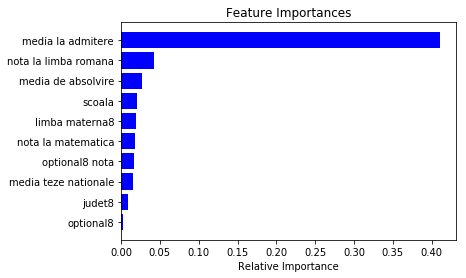

In [44]:
importances = model.feature_importances_[:10]
indices = np.argsort(importances)
features = X_label.columns

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [ ]:
#we got similar results here, the only difference is that we can see that 'scoala' is in fact a really important feature

In [17]:
#Let's try other algorithms
#Other algorithms need normalization
number_columns = []
for col in X.columns:
    if X[col].dtype != 'object' and 'nume' not in col:
        number_columns.append(col)
        X[col] = X[col].astype(float)

print number_columns

scaler = StandardScaler()

X_scale = X.copy()
X_scale[number_columns] = scaler.fit_transform(X[number_columns])
X_scale.head()

['media la admitere', 'media teze nationale', 'media de absolvire', 'nota la limba romana', 'nota la matematica', 'optional8 nota', 'limba moderna nota', 'disciplina profil final', 'optional final']


,judet8,scoala,media la admitere,media teze nationale,media de absolvire,nota la limba romana,nota la matematica,optional8,optional8 nota,limba materna8,...,nume_zina,nume_zita,nume_zoltan,nume_zorand,nume_zsofia,nume_zsolt,nume_zsombor,nume_zsuzsa,nume_zsuzsana,nume_zsuzsanna
0,BIHOR,SC.CU CLS.I-VIII PIETROASA,0.902167,0.982249,0.643926,0.595819,1.222560,Geografie,0.790473,-,...,0,0,0,0,0,0,0,0,0,0
1,BIHOR,"SC.CU CLS.I-VIII ""N.POPOVICIU"" BEIUS",0.681971,0.581120,0.750584,0.678269,0.184877,Geografie,0.702863,-,...,0,0,0,0,0,0,0,0,0,0
2,BIHOR,SC.CU CLS.I-VIII CALUGARI,0.230570,-0.041910,0.617262,0.246992,-0.552236,Geografie,0.264809,-,...,0,0,0,0,0,0,0,0,0,0
3,BIHOR,SC.CU CLS.I-VIII CARASAU,-0.154772,0.222664,-0.729293,0.044039,0.149095,Geografie,0.527641,-,...,0,0,0,0,0,0,0,0,0,0
4,BIHOR,"LICEUL PEDAGOGIC ""N.BOLCAS"" BEIUS",-0.209820,-0.187000,-0.222669,-0.526769,0.700140,Istorie,-0.637581,-,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#one hot encoder is faster for Linear Regression than pandas' dummy variables 
ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(), categorical_features_indices)],    # The column numbers to be transformed (here is [0] but can be [0, 1, 3])
    remainder='passthrough'                         # Leave the rest of the columns untouched
)

X_scale = ct.fit_transform(X_scale)

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, test_size=0.20, random_state = 40)

regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 
Y_pred = regressor.predict(X_test)
print mean_squared_error(Y_test, Y_pred)
print mean_absolute_error(Y_test, Y_pred)
print regressor.score(X_test, Y_test)

2.0757439928618266
1.0719648569005993
0.5092041068285487


In [ ]:
#so we get an accuracy of 50% - way too bad

In [67]:
#let's try a more powerful algorithm - the support vector regressor
from sklearn.svm import SVR

regressor = SVR(kernel = 'linear')
regressor.fit(X_train, Y_train)

Y_pred = regressor.predict(X_test)

print mean_squared_error(Y_test, Y_pred)
print mean_absolute_error(Y_test, Y_pred)
print regressor.score(X_test, Y_test)

1.4382562972037762
0.9229181345608222
0.6599338423124226


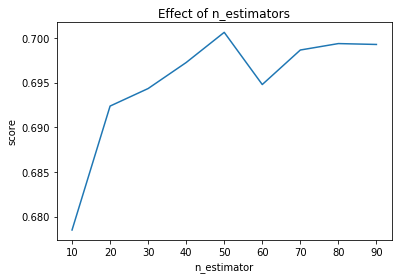

In [68]:
#Let's try again the Random Forest Regressor but this time with variable size

X_train, X_test, Y_train, Y_test = train_test_split(X_label, Y, test_size=0.20, random_state = 40)

model = RandomForestRegressor(n_jobs=-1)
estimators = np.arange(10, 100, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, Y_train.ravel())
    scores.append(model.score(X_test, Y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [ ]:
#it seems that 100 is a good number for the size of the random forest

In [79]:
#let's try a really powerful regressor
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor 

X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, test_size=0.20, random_state = 40)

regressor=GradientBoostingRegressor(n_estimators=100, max_depth=5)
regressor.fit(X_train, Y_train)
Y_pred = regressor.predict(X_test)
print(regressor.score(X_test,Y_test))


scores = cross_val_score(regressor, X_scale, Y, cv=5)
print scores
print scores.mean()

0.7181815335903945
[0.64450642 0.66880038 0.67632634 0.76562924 0.67505647]
0.6860637720886873


In [ ]:
#great, so far this is the highest accuracy score
#the cross validation score is also high

In [106]:
#Now we try to detect and elimiante the outliers - the algorithm probably overfits because of them

from sklearn.ensemble import IsolationForest
anomalies_ratio = 0.09 # define % of anomalies(that we think we have)

X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, test_size=0.20, random_state = 40)

clf=IsolationForest(n_estimators = 100, 
                        max_samples = 256,
                        contamination = anomalies_ratio, 
                        behaviour= " new", 
                        random_state = np.random.RandomState(42))

clf.fit(X_train)
pred = clf.predict(X_train)

outlier_index = []
for i,p in enumerate(pred):
    if p==-1:
        outlier_index.append(i)
        
print outlier_index

[0, 1, 26, 28, 50, 74, 84, 88, 90, 109, 116, 126, 138, 150, 173, 185, 187, 198, 206, 209, 211, 216, 221, 223, 233, 235, 238, 242, 248, 285, 310, 315, 325, 327, 332, 351, 371, 375, 377, 379, 388, 396, 402, 442, 443, 447, 449, 450, 452, 467, 478, 480, 484, 485, 493, 517, 528, 531, 539, 564, 575, 590, 591, 593, 642, 643, 660, 678, 680, 693, 694, 702, 707, 713, 731, 748, 752, 786, 814, 821, 829, 841, 856, 875, 895, 904, 911, 913, 918, 922, 928, 938, 950, 955, 979, 986, 992, 994, 1011, 1017, 1019, 1025, 1028, 1029, 1031, 1061, 1066, 1082, 1084, 1099, 1100, 1101, 1113, 1121, 1123, 1138, 1141, 1144, 1146, 1150, 1158, 1167, 1179, 1180, 1233, 1236, 1240, 1247, 1251, 1252, 1262, 1276, 1304, 1311, 1320, 1335, 1372, 1383, 1386, 1445, 1452, 1456, 1472, 1483, 1493, 1510, 1523, 1525, 1530, 1533, 1540, 1557, 1579, 1583, 1607, 1608, 1625, 1640, 1655, 1658, 1662, 1675, 1681, 1687, 1691, 1708, 1713, 1728, 1731, 1740, 1747, 1754, 1766, 1784, 1786, 1789, 1797, 1805, 1815, 1818, 1834, 1838, 1839, 1840, 1853

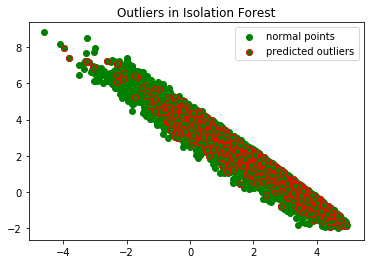

In [107]:
# try to visualize the detected outliers
from sklearn.decomposition import TruncatedSVD
pca = TruncatedSVD(2)#PCA for sparse array
pca.fit(X_scale)
res=pd.DataFrame(pca.transform(X_scale))

plt.title("Outliers in Isolation Forest")
plt.scatter(res[0], res[1], c='green',
                 label="normal points")
plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='green', edgecolor="red", label="predicted outliers")
plt.legend()
plt.show()

In [ ]:
#the plot is not conclusive, we cannot say for sure that they are outliers
#so try to draw a plot for each pair of features and find the outliers...........

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X_label, Y, test_size=0.20, random_state = 40)

full_X_Y = pd.concat([X_train, Y_train], axis = 1)

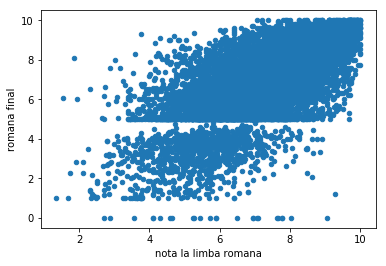

In [52]:
two_feat = full_X_Y[["nota la limba romana", "romana final"]]
two_feat.plot.scatter(x = "nota la limba romana", y = "romana final")

In [53]:
#we can observe some outliers there
#let's check them with DBSCAN 

from sklearn.cluster import DBSCAN
outlier_detection = DBSCAN(
  eps = 0.5,
  metric="euclidean",
  min_samples = 3,
  n_jobs = -1)
clusters = outlier_detection.fit_predict(two_feat)
np.unique(clusters, return_counts=True)

(array([-1,  0,  1,  2,  3,  4], dtype=int64),
 array([  19, 8049,    5,    5,    6,    5], dtype=int64))

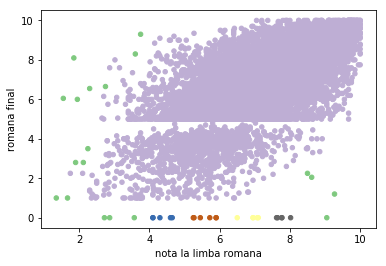

In [54]:
from matplotlib import cm
cmap = cm.get_cmap('Accent')
two_feat.plot.scatter(
  x = "nota la limba romana", y = "romana final",
  c = clusters,
  cmap = cmap,
  colorbar = False
)

In [64]:
#yes, in fact those point are outliers
#so, remove them
outlier_list_index_all = set([])

for ind, v in enumerate(clusters):
    if v !=0:#outlier
        outlier_list_index_all.add(ind)

In [65]:
outlier_list_index_all

{379,
 452,
 604,
 938,
 1004,
 1160,
 1296,
 1494,
 1547,
 1616,
 2076,
 2147,
 2152,
 2166,
 2191,
 2316,
 2541,
 3136,
 3291,
 3371,
 3442,
 3698,
 3945,
 4718,
 4882,
 5003,
 5351,
 5589,
 5769,
 6055,
 6341,
 6353,
 6407,
 6482,
 6795,
 6849,
 7193,
 7216,
 7524,
 7700}

In [83]:
#find other outliers
def find_outlier(feature1, feature2, eps = 0.5):
    two_feat = full_X_Y[[feature1,feature2]]
    two_feat.plot.scatter(x =feature1, y = feature2)

    outlier_detection = DBSCAN(
      eps = eps,
      metric="euclidean",
      min_samples = 3,
      n_jobs = -1)
    clusters = outlier_detection.fit_predict(two_feat)

    cmap = cm.get_cmap('Accent')
    two_feat.plot.scatter(
      x = feature1, y = feature2,
      c = clusters,
      cmap = cmap,
      colorbar = False
    )
    
    return clusters

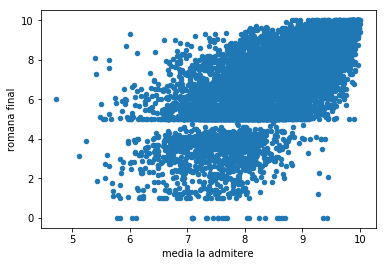

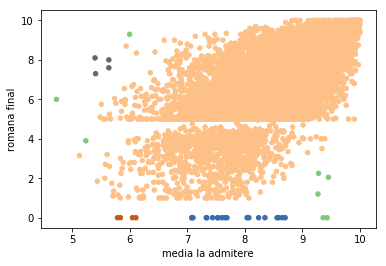

In [76]:
clusters = find_outlier("media la admitere","romana final")

In [79]:
#before removing outliers, we want to be sure that they can be removed - so manual checking is important(checking the plot)

for ind, v in enumerate(clusters):
    if v !=0:#outlier
        outlier_list_index_all.add(ind)
        
len(outlier_list_index_all)

44

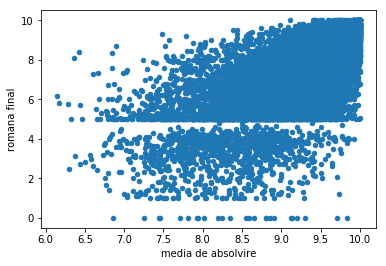

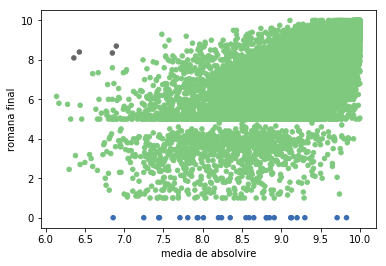

In [80]:
clusters = find_outlier("media de absolvire","romana final")

In [81]:
for ind, v in enumerate(clusters):
    if v !=0:#outlier
        outlier_list_index_all.add(ind)
        
len(outlier_list_index_all)

47

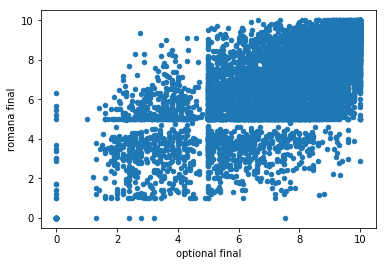

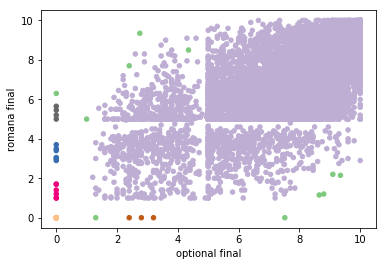

In [82]:
clusters = find_outlier("optional final","romana final")

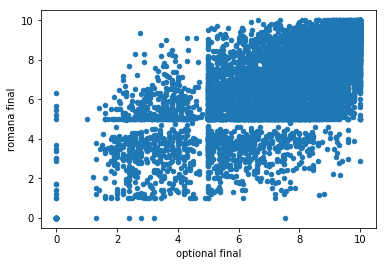

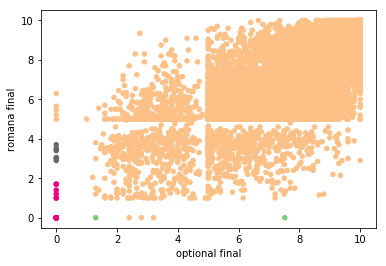

In [86]:
#well some points aren't really outliers
#try again with another value of eps
clusters = find_outlier("optional final","romana final", eps = 1)

In [87]:
#this is better now
for ind, v in enumerate(clusters):
    if v !=0:#outlier
        outlier_list_index_all.add(ind)
        
len(outlier_list_index_all)

59

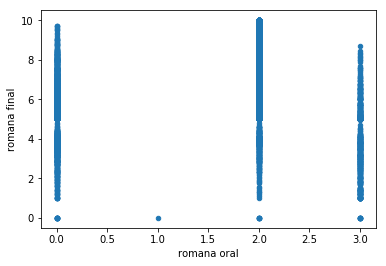

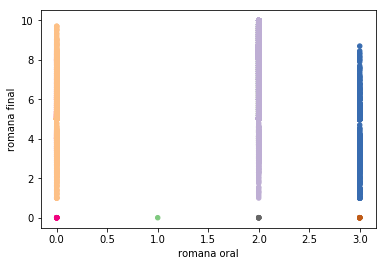

In [89]:
clusters = find_outlier("romana oral","romana final", eps = 0.3)

In [ ]:
#those aren't neccessariliy outliers

In [108]:
X_train2 = X_train.reset_index()
print X_train2.shape
X_train2.head()

(8089, 1048)


,index,judet8,scoala,media la admitere,media teze nationale,media de absolvire,nota la limba romana,nota la matematica,optional8,optional8 nota,...,nume_zina,nume_zita,nume_zoltan,nume_zorand,nume_zsofia,nume_zsolt,nume_zsombor,nume_zsuzsa,nume_zsuzsana,nume_zsuzsanna
0,1944,32,2581,9.76,9.56,9.96,9.82,9.05,0,9.92,...,0,0,0,0,0,0,0,0,0,0
1,7578,6,1934,8.65,7.84,9.46,7.55,7.57,0,8.40,...,0,0,0,0,0,0,0,0,0,0
2,8901,14,1026,7.29,6.91,7.68,5.57,7.27,0,7.90,...,0,0,0,0,0,0,0,0,0,0
3,9695,29,1076,8.88,8.19,9.57,7.42,8.25,0,8.90,...,0,0,0,0,0,0,0,0,0,0
4,10111,13,807,8.83,8.16,9.50,8.45,6.55,0,9.50,...,0,0,0,0,0,0,0,0,0,0


In [109]:
#remove the outliers from the training set
X_train2 = X_train2.drop(outlier_list_index_all)
X_train2.shape

(8030, 1048)

In [110]:
regressor=RandomForestRegressor(n_estimators=100, max_depth=5)
regressor.fit(X_train, Y_train)
Y_pred = regressor.predict(X_test)
print(regressor.score(X_test,Y_test))


scores = cross_val_score(regressor, X_scale, Y, cv=5)
print scores
print scores.mean()

0.6740417704854149
[0.59387817 0.63341213 0.63494939 0.69651263 0.65137657]
0.6420257779734593


In [ ]:
#ok, so removing outliers didn't help.........
#in fact it reduced the accuracy score